# Using LinearRegression and Lasso model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [3]:
df=pd.read_csv("C:\\Users\\ASUS\\Downloads\\archive (2)\\car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [9]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [10]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [15]:
df.replace({'Transmission':{'Manual':0,'Automatic':1},'Seller_Type':{'Dealer':0,'Individual':1},'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [18]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)

In [19]:
y=df['Selling_Price']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [22]:
reg=LinearRegression()

In [23]:
reg.fit(x_train,y_train)

LinearRegression()

In [34]:
train_predicetion=reg.predict(x_train)
train_predicetion

array([ 3.73088505e+00,  5.60702081e+00,  7.79779356e+00, -1.88374756e+00,
        6.71614572e+00,  8.14343296e+00,  5.84067525e+00,  6.17919527e+00,
        6.15863751e+00,  1.59459051e+01,  2.15385926e+00,  1.11618544e+00,
       -4.05463414e-01,  6.69051516e+00,  6.81961414e+00,  1.02957394e+00,
        6.74306974e+00,  1.43864300e+01,  3.00001893e+00,  7.95149024e+00,
       -8.38569413e-01,  9.02067892e+00,  1.21210550e+00,  2.20040027e+00,
       -8.23744275e-01,  7.52651502e-01,  1.00142469e+01, -4.08950275e-01,
       -2.40418357e+00,  9.99845989e+00,  6.81867179e+00,  1.09249928e+00,
        4.36158792e+00,  9.20660480e-02,  3.48993776e+00,  2.78147834e+00,
        1.50401026e+00,  4.65736158e-01,  1.68679810e+00,  1.18722506e+00,
        4.32936153e+00,  6.09932798e+00,  9.51639926e-01,  7.52875828e-01,
        6.05967594e+00,  3.49453005e+00,  2.40969246e+00,  7.52230513e+00,
        4.63113915e+00,  4.44239322e+00,  4.22460259e+00,  2.71077171e+00,
        4.46881874e+00,  

In [35]:
train_score=metrics.r2_score(y_train,train_predicetion)
train_score

0.8799451660493715

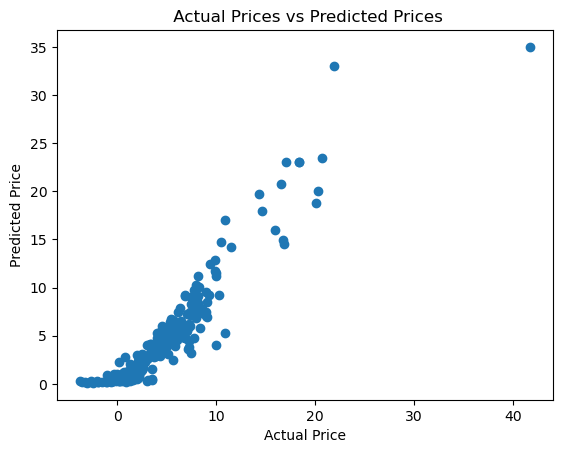

In [39]:
plt.scatter(train_predicetion,y_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


In [40]:
test_data_predicetion=reg.predict(x_test)

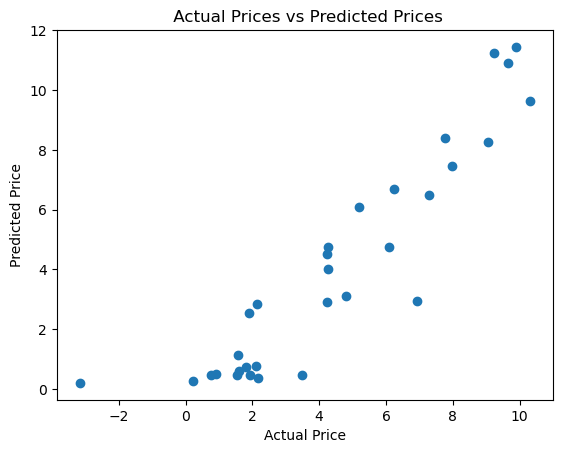

In [42]:
plt.scatter(test_data_predicetion,y_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [44]:
error=metrics.r2_score(test_data_predicetion,y_test)
error

0.8062199941174977

# Lasso_regression

In [45]:
le=Lasso()

In [46]:
le.fit(x_train,y_train)

Lasso()

In [47]:
train_predicetion=le.predict(x_train)
train_predicetion

array([ 3.56679076e+00,  5.60257564e+00,  8.28781371e+00, -8.30814314e-01,
        5.27539880e+00,  6.50367937e+00,  5.73552938e+00,  6.41187200e+00,
        4.78218845e+00,  1.54979701e+01,  2.60868685e+00,  1.68164537e+00,
        4.65587149e-01,  5.14260426e+00,  6.87569869e+00,  1.60372469e+00,
        5.30299396e+00,  1.39150016e+01,  2.86877663e+00,  6.44421824e+00,
        9.38523430e-02,  9.99955865e+00,  1.79683394e+00,  2.66121014e+00,
        2.10269105e-02,  1.39327221e+00,  1.01152846e+01,  4.55985698e-01,
       -1.29850564e+00,  8.96458834e+00,  6.87473286e+00,  2.80689227e+00,
        4.00679563e+00,  8.93707044e-01,  3.11243615e+00,  2.61344453e+00,
        2.13519495e+00,  1.21115483e+00,  2.20395877e+00,  1.77253883e+00,
        4.40123646e+00,  4.26379158e+00,  1.53108120e+00,  2.67410546e+00,
        4.37186991e+00,  2.41613935e+00,  2.90706331e+00,  6.07491388e+00,
        5.02364608e+00,  4.39669701e+00,  3.59203190e+00,  2.67643327e+00,
        4.41172590e+00,  

In [48]:
train_score=metrics.r2_score(y_train,train_predicetion)
train_score

0.8427856123435794

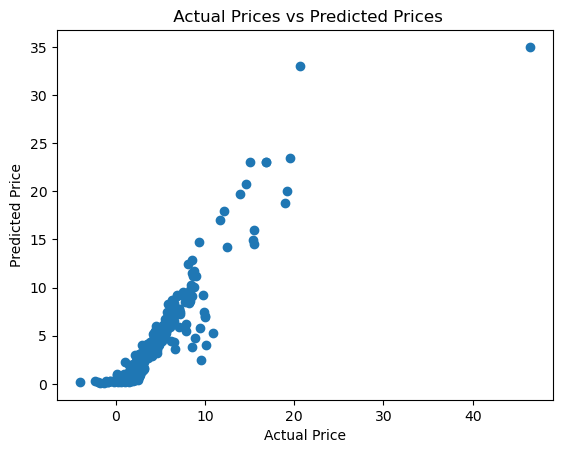

In [49]:
plt.scatter(train_predicetion,y_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_predicetion=reg.predict(x_test)